In [78]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# from scipy.stats import zscore
# import seaborn as sns
plt.style.use('ggplot')

# Food Ingredients and Allergens (Predição com KNN)

Classificar se um alimento possui ou não alérgenos

Comecemos por ler o arquivo pelo link no github

In [79]:
url = 'https://raw.githubusercontent.com/mochaeng/Intelligent-Systems/main/projects/exer-3/allergens/food_ingredients_and_allergens.csv'
df = pd.read_csv(url)
df.head()

,Food Product,Main Ingredient,Sweetener,Fat/Oil,Seasoning,Allergens,Prediction
0,Almond Cookies,Almonds,Sugar,Butter,Flour,"Almonds, Wheat, Dairy",Contains
1,Almond Cookies,Almonds,Sugar,Butter,Flour,"Almonds, Wheat, Dairy",Contains
2,Chicken Noodle Soup,Chicken broth,None,None,Salt,"Chicken, Wheat, Celery",Contains
3,Chicken Noodle Soup,Chicken broth,None,None,Salt,"Chicken, Wheat, Celery",Contains
4,Cheddar Cheese,Cheese,None,None,Salt,Dairy,Contains


# Visão geral da base

- Percebemos que cada coluna possui diversos valores únicos. Como examplo, **Food Product** possui 259, enquanto **Sweetener** 10;
- A base possui um valor ausente para a categoria de **Prediction**
- A base possui 90 linhas duplicadas

In [80]:
df.describe()

,Food Product,Main Ingredient,Sweetener,Fat/Oil,Seasoning,Allergens,Prediction
count,399,399,399,399,399,399,398
unique,259,101,10,36,186,40,2
top,Stuffed Bell Peppers,Chicken,None,Olive oil,None,None,Contains
freq,4,61,280,90,20,148,255


In [81]:
df.isna().sum()

Food Product       0
Main Ingredient    0
Sweetener          0
Fat/Oil            0
Seasoning          0
Allergens          0
Prediction         1
dtype: int64

In [82]:
df.duplicated().sum()

90

# Tratamento à priori da base

- A coluna **Prediction** será renomeada para **Target**
- Remoção da linha que possui valor ausente
- Remoção dos valores duplicados. Comente essa linha se desejares considerá-los

In [83]:
df = df.rename(columns={'Prediction': 'Target'})

In [84]:
df = df.dropna(subset='Target')

In [85]:
# df = df.loc[~df.duplicated()]

# Normalização categórica da base

Somente a técnica One Hot Encoding foi utilizada em virtude de:

- Colunas possuirem muitos valores diferentes, algumas na casa das centenas.
- Ser difícil estabelecer uma ordem entre esses valores. Assim, a técnica de _Ordinal Encoding_ foi descartada
- Em relação a técnica de _Label Encoding_, tantos valores únicos nas colunas acabariam criando distorções, pois haveria valores muito altos e outros baixos

Após a normalização cetegórica (One Hot Encoding), o _dataframe_ ficará na variável: **allergens_df**

Em virtude do método utilizado ter sido o One Hot Encoding, muitíssimas colunas auxiliares foram criadas, portanto a abordagem para dropar uma coluna consiste em remover alguma antes da normalização categórica.

- Para usar alguma abordagem, apenas descomente a linha desejada

In [86]:
## Nominal (One Hot Encoding)

# Abordagem 1
df = df.drop(columns=[])
nominal_columns = ['Food Product', 'Main Ingredient', 'Sweetener', 'Fat/Oil', 'Seasoning', 'Allergens']

#Abordagem 2
# df = df.drop(columns=['Food Product'])
# nominal_columns = ['Main Ingredient', 'Sweetener', 'Fat/Oil', 'Seasoning', 'Allergens']

#Abordagem 3
#df = df.drop(columns=['Main Ingredient'])
#nominal_columns = ['Food Product', 'Sweetener', 'Fat/Oil', 'Seasoning', 'Allergens']

#Abordagem 4
#df = df.drop(columns=['Sweetener'])
#nominal_columns = ['Food Product', 'Main Ingredient', 'Fat/Oil', 'Seasoning', 'Allergens']

#Abordagem 5
#df = df.drop(columns=['Fat/Oil'])
#nominal_columns = ['Food Product', 'Main Ingredient', 'Sweetener', 'Seasoning', 'Allergens']

#Abordagem 6
#df = df.drop(columns=['Seasoning'])
#nominal_columns = ['Food Product', 'Main Ingredient', 'Sweetener', 'Fat/Oil', 'Allergens']

#Abordagem 7
#df = df.drop(columns=['Allergens'])
#nominal_columns = ['Food Product', 'Main Ingredient', 'Sweetener', 'Fat/Oil', 'Seasoning']

allergens_df = pd.get_dummies(df, prefix=nominal_columns, columns=nominal_columns, dtype=int)
allergens_df

,Target,Food Product_Almond Cookies,Food Product_Aloo Gobi,Food Product_Aloo Paratha,Food Product_Apple,Food Product_Apple Cider,Food Product_Apple Crisp,Food Product_Apple Pie,Food Product_Avocado Toast,Food Product_BBQ Ribs,...,"Allergens_Shellfish, Soybeans",Allergens_Soybeans,"Allergens_Soybeans, Fish",Allergens_Wheat,"Allergens_Wheat, Dairy","Allergens_Wheat, Dairy, Alcohol","Allergens_Wheat, Dairy, Cocoa","Allergens_Wheat, Dairy, Eggs","Allergens_Wheat, Dairy, Nuts","Allergens_Wheat, Pork, Dairy"
0,Contains,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Contains,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Contains,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Contains,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Contains,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394,Contains,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
395,Contains,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
396,Contains,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
397,Contains,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


# Realização do treinamento

- Separação da base em **X** e **y**
- O split escolhido foi 70-30
- É retornado em um dataframe: o valor de k e a acurácia.

In [87]:
X = allergens_df.drop(columns=['Target'])
y = allergens_df['Target']

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=333)

results = []
for i in range(1, 14):
    knn_obesity = KNeighborsClassifier(n_neighbors=i)
    knn_obesity.fit(X_train, y_train)
    results.append(
        [i, accuracy_score(y_test, knn_obesity.predict(X_test))]
    )

accuracy_df = pd.DataFrame(results, columns=['K', 'Accuracy'])
accuracy_df

,K,Accuracy
0,1,0.991667
1,2,0.991667
2,3,0.958333
3,4,0.975000
4,5,0.941667
5,6,0.958333
6,7,0.933333
7,8,0.950000
8,9,0.925000
9,10,0.941667


# A visualizar os dados

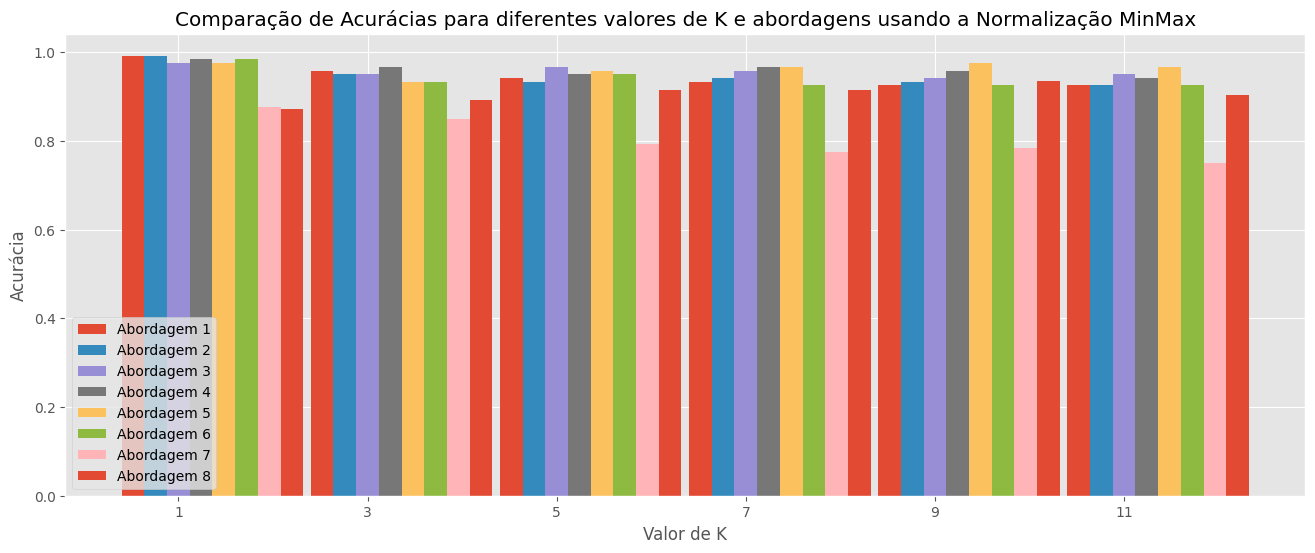

In [89]:
valores_k = [1, 3, 5, 7, 9, 11]
#MINMAX
abordagem1= [0.991667, 0.958333, 0.941667, 0.933333, 0.925000, 0.925000]
abordagem2= [0.991667, 0.950000, 0.933333, 0.941667, 0.933333, 0.925000]
abordagem3= [0.975000, 0.950000, 0.966667, 0.958333, 0.941667, 0.950000]
abordagem4= [0.983333, 0.966667, 0.950000, 0.966667, 0.958333, 0.941667]
abordagem5= [0.975000, 0.933333, 0.958333, 0.966667, 0.975000, 0.966667]
abordagem6= [0.983333, 0.933333, 0.950000, 0.925000, 0.925000, 0.925000]
abordagem7= [0.875000, 0.850000, 0.791667, 0.775000, 0.783333, 0.750000]
abordagem8= [0.870968, 0.892473, 0.913978, 0.913978, 0.935484, 0.903226]



#BARRAS AGRUPADAS
bar_width = 0.12
index = np.arange(len(valores_k))
plt.figure(figsize=(16, 6))
plt.bar(index, abordagem1, bar_width, label="Abordagem 1")
plt.bar(index + bar_width, abordagem2, bar_width, label="Abordagem 2")
plt.bar(index + 2*bar_width, abordagem3, bar_width, label="Abordagem 3")
plt.bar(index + 3*bar_width, abordagem4, bar_width, label="Abordagem 4")
plt.bar(index + 4*bar_width, abordagem5, bar_width, label="Abordagem 5")
plt.bar(index + 5*bar_width, abordagem6, bar_width, label="Abordagem 6")
plt.bar(index + 6*bar_width, abordagem7, bar_width, label="Abordagem 7")
plt.bar(index + 7*bar_width, abordagem8, bar_width, label="Abordagem 8")

plt.title('Comparação de Acurácias para diferentes valores de K e abordagens')

plt.xlabel('Valor de K')
plt.ylabel('Acurácia')
plt.title('Comparação de Acurácias para diferentes valores de K e abordagens usando a Normalização MinMax')
plt.xticks(index + 2*bar_width, valores_k)
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

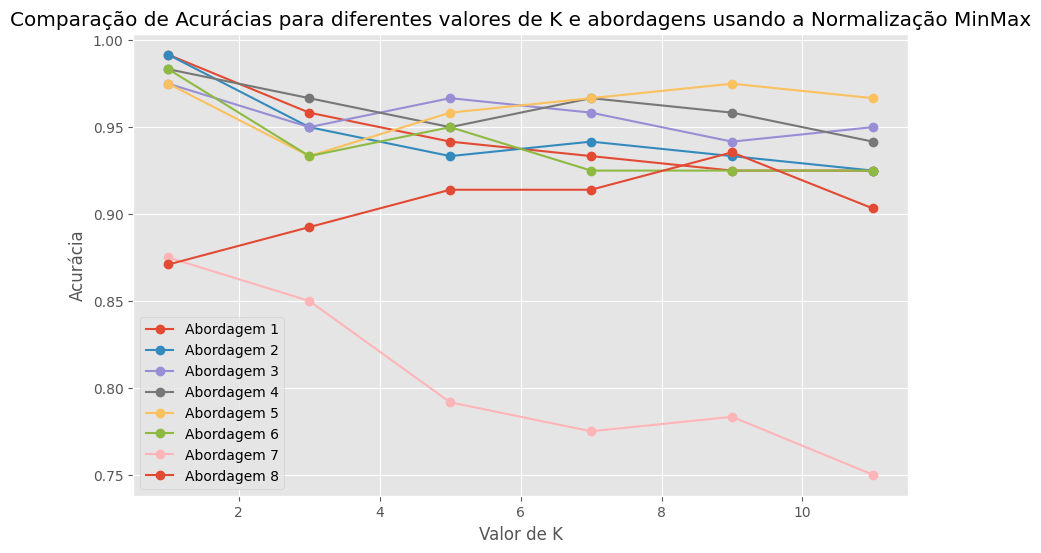

In [90]:
plt.figure(figsize=(10, 6))

abordagem1= [0.991667, 0.958333, 0.941667, 0.933333, 0.925000, 0.925000]
abordagem2= [0.991667, 0.950000, 0.933333, 0.941667, 0.933333, 0.925000]
abordagem3= [0.975000, 0.950000, 0.966667, 0.958333, 0.941667, 0.950000]
abordagem4= [0.983333, 0.966667, 0.950000, 0.966667, 0.958333, 0.941667]
abordagem5= [0.975000, 0.933333, 0.958333, 0.966667, 0.975000, 0.966667]
abordagem6= [0.983333, 0.933333, 0.950000, 0.925000, 0.925000, 0.925000]
abordagem7= [0.875000, 0.850000, 0.791667, 0.775000, 0.783333, 0.750000]
abordagem8= [0.870968, 0.892473, 0.913978, 0.913978, 0.935484, 0.903226]

#LINHAS
plt.plot(valores_k, abordagem1, label="Abordagem 1", marker='o')
plt.plot(valores_k, abordagem2, label="Abordagem 2", marker='o')
plt.plot(valores_k, abordagem3, label="Abordagem 3", marker='o')
plt.plot(valores_k, abordagem4, label="Abordagem 4", marker='o')
plt.plot(valores_k, abordagem5, label="Abordagem 5", marker='o')
plt.plot(valores_k, abordagem6, label="Abordagem 6", marker='o')
plt.plot(valores_k, abordagem7, label="Abordagem 7", marker='o')
plt.plot(valores_k, abordagem8, label="Abordagem 8", marker='o')


plt.xlabel('Valor de K')
plt.ylabel('Acurácia')
plt.title('Comparação de Acurácias para diferentes valores de K e abordagens usando a Normalização MinMax')
plt.legend()
plt.grid(True)
plt.show()